# TP3 - Banco de Dados
Alunos: Isabelly Rohana, Juliana Magalhães e Tedy Prist.


Depois de realizar um fork do repositório https://github.com/tarsisazevedo/ufam-db-tp3 foram realizados as seguintes tarefas divididas em 5 partes a seguir:

## Parte I

### Tarefa 1 – Instalação do PostgreSQL

A primeira tarefa deste trabalho consiste na instalação do PostgreSQL. Os fontes e as instruções de instalação estão em: http://www.postgresql.org. 
O que entregar: Deve ser apresentada saída do log de instalação

In [ ]:
!sudo apt-get update
!sudo apt-get install -y postgresql postgresql-contrib

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,533 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3

In [ ]:
!sudo service postgresql start

 * Starting PostgreSQL 10 database server
   ...done.


### Tarefa 2 – Geração de um BD de testes

A segunda tarefa deste trabalho consiste na criação de banco de dados em cada um dos sistemas e o povoamento destas tabelas com dados sintéticos. O que entregar: Devem ser apresentadas as saídas da execução dos scripts de geração.

In [ ]:
!wget -q https://github.com/electrum/tpch-dbgen/archive/32f1c1b92d1664dba542e927d23d86ffa57aa253.zip -O tpch-dbgen.zip
!unzip -q tpch-dbgen.zip && mv tpch-dbgen-32f1c1b92d1664dba542e927d23d86ffa57aa253 tpch-dbgen && rm tpch-dbgen.zip


!wget -q https://github.com/foliveirafilho/tpch-pgsql/archive/refs/heads/master.zip -O tpch-pgsql.zip
!unzip /content/tpch-pgsql.zip  && rm tpch-pgsql.zip
!pip3 install -r /content/tpch-pgsql-master/requirements.txt

!mv /content/tpch-pgsql-master/Makefile /content/
!mv /content/tpch-pgsql-master/query_root /content/


Archive:  /content/tpch-pgsql.zip
1dae26efabfe17c992ebb08e5af69de6567ba38c
   creating: tpch-pgsql-master/
  inflating: tpch-pgsql-master/.gitignore  
 extracting: tpch-pgsql-master/.gitmodules  
  inflating: tpch-pgsql-master/.travis.yml  
  inflating: tpch-pgsql-master/LICENSE  
  inflating: tpch-pgsql-master/Makefile  
  inflating: tpch-pgsql-master/README.md  
   creating: tpch-pgsql-master/docs/
  inflating: tpch-pgsql-master/docs/Makefile  
  inflating: tpch-pgsql-master/docs/make.bat  
   creating: tpch-pgsql-master/docs/source/
  inflating: tpch-pgsql-master/docs/source/conf.py  
  inflating: tpch-pgsql-master/docs/source/index.rst  
  inflating: tpch-pgsql-master/iceis2012.pdf  
   creating: tpch-pgsql-master/images/
  inflating: tpch-pgsql-master/images/TPC-H_Datamodel.png  
  inflating: tpch-pgsql-master/images/tpch_process.png  
   creating: tpch-pgsql-master/query_root/
   creating: tpch-pgsql-master/query_root/perf_query_template/
  inflating: tpch-pgsql-master/query_root

In [ ]:
!sudo -u postgres createdb tpch
!/content/tpch-pgsql-master/tpch_pgsql.py -g /content/tpch-dbgen prepare
!/content/tpch-pgsql-master/tpch_pgsql.py -g /content/tpch-dbgen load

gcc -g -DDBNAME=\"dss\" -DLINUX -DORACLE -DTPCH -DRNG_TEST -D_FILE_OFFSET_BITS=64   -c -o build.o build.c
gcc -g -DDBNAME=\"dss\" -DLINUX -DORACLE -DTPCH -DRNG_TEST -D_FILE_OFFSET_BITS=64   -c -o driver.o driver.c
driver.c: In function ‘gen_tbl’:
driver.c:368:41: warning: format ‘%ld’ expects argument of type ‘long int’, but argument 3 has type ‘long long int’ [-Wformat=]
    printf("\nSeeds for %s at rowcount %ld\n", tdefs[tnum].comment, i);
                                       ~~^
                                       %lld
gcc -g -DDBNAME=\"dss\" -DLINUX -DORACLE -DTPCH -DRNG_TEST -D_FILE_OFFSET_BITS=64   -c -o bm_utils.o bm_utils.c
gcc -g -DDBNAME=\"dss\" -DLINUX -DORACLE -DTPCH -DRNG_TEST -D_FILE_OFFSET_BITS=64   -c -o rnd.o rnd.c
rnd.c: In function ‘row_stop’:
rnd.c:131:56: warning: format ‘%ld’ expects argument of type ‘long int’, but argument 4 has type ‘long long int’ [-Wformat=]
     fprintf(stderr, "\nSEED CHANGE: seed[%d].usage = %ld\n",
                                  

In [ ]:
!sudo apt-get install sqlite3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 753 kB of archives.
After this operation, 2,483 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 sqlite3 amd64 3.22.0-1ubuntu0.5 [753 kB]
Fetched 753 kB in 1s (802 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: f

In [ ]:
!sqlite3 tpch.db \
".read /content/tpch-dbgen/dss.ddl" \
".separator '|'" \
".import /content/data/load/customer.tbl.csv customer" \
".import /content/data/load/lineitem.tbl.csv lineitem" \
".import /content/data/load/nation.tbl.csv nation" \
".import /content/data/load/orders.tbl.csv orders" \
".import /content/data/load/part.tbl.csv part" \
".import /content/data/load/partsupp.tbl.csv partsupp" \
".import /content/data/load/region.tbl.csv region" \
".import /content/data/load/supplier.tbl.csv supplier" \
".exit"

### Tarefa 3 – Execução de Consultas

A terceira tarefa deste trabalho consiste na execução de uma série de consultas do Benchmark TPC-H nos sistemas instalados. 
Usando as instruções disponíveis nas mesmas URLs acima, execute os passos referentes ao PostgreSQL.  

O que entregar: Devem ser apresentadas as consultas e os seus resultados

In [ ]:
!/content/tpch-pgsql-master/tpch_pgsql.py -g /content/tpch-dbgen query

Power tests started ...
Power tests finished.
Throughput tests started ...
Throughput tests in stream #1 started ...
Throughput tests in stream #2 started ...
Throughput tests finished.
done performance tests
Power@Size = 2715.247797243593
Throughput@Size = 1284.2099359274098
QphH@Size = 1867.3371949718228
========================= Metrics ==========================
power_size: 2715.247797243593
throughput_size: 1284.2099359274098
qphh_size: 1867.3371949718228
======================= End Results ========================


In [ ]:
def gerarCopiaConsultas():
    pathConsultas = "tpch-dbgen/queries/"
    pathCopias = "tpch-dbgen/copia_consultas/"

    for i in range(1, 23):
        fq = open(pathConsultas + str(i) + ".sql", "r")
        fc = open(pathCopias + str(i) + ".sql", "w")
        for l in fq:
            if(not (":x" in l) and not (":n" in l) and not (":o" in l)):
                fc.write(l)

In [ ]:
import os

!mkdir tpch-dbgen/copia_consultas
gerarCopiaConsultas()

pathCopias = "tpch-dbgen/copia_consultas/"
for i in range(1, 23):
    filename = pathCopias + str(i) + ".sql"
    os.system("sqlite3 tpch.db \".%s\"" % filename)

### Tarefa 4 – Identificação do Sistema

Identifique o sistema que será usado para os experimentos, incluindo informações sobre o hardware e o Sistema Operacional utilizado. Sobre o tipo de processador, quantidade de memória RAM, tamanho do disco. Devem ser também apresentadas informações sobre as caches existentes.  Sobre o Sistema Operacional, que devem ser Linux, incluir informações sobre qual a distribuição usada, versão do sistema, versão do Kernel, etc.

O que entregar: As informações pedidas devem ser apresentadas no jupyter notebook


#### Sistema operacional

In [ ]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="20.04.5 LTS (Focal Fossa)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 20.04.5 LTS"
VERSION_ID="20.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=focal
UBUNTU_CODENAME=focal


In [ ]:
print("Kernel version: ")
!uname -r

Kernel version: 
5.15.107+


#### Hardware

In [ ]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2199.998
BogoMIPS:                        4399.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
print("Memória RAM")
!free -h

Memória RAM
              total        used        free      shared  buff/cache   available
Mem:           12Gi       478Mi       9.3Gi       1.0Mi       2.9Gi        11Gi
Swap:            0B          0B          0B


In [ ]:
print("Disco")
!df -H

Disco
Filesystem      Size  Used Avail Use% Mounted on
overlay         116G   25G   91G  22% /
tmpfs            68M     0   68M   0% /dev
shm             6.2G     0  6.2G   0% /dev/shm
/dev/root       2.1G  1.1G  999M  52% /usr/sbin/docker-init
tmpfs           6.9G  885k  6.9G   1% /var/colab
/dev/sda1        44G   27G   17G  61% /etc/hosts
tmpfs           6.9G     0  6.9G   0% /proc/acpi
tmpfs           6.9G     0  6.9G   0% /proc/scsi
tmpfs           6.9G     0  6.9G   0% /sys/firmware


### Tarefa 5 - Verificação de parâmetros de armazenamento

a) Verifique no disco que será usado para os experimentos no laboratório os seguintes parâmetros: Nr. de superfícies, cilindros, setores por trilha, velocidade de rotação, latência rotacional; tempos de seek médio, máximo e mínimo; tempo para a próxima trilha; e taxa de transferência.

b) Utilizando o comando “hdparm” do Linux, verifique os parâmetros dos parâmetros de S.O. que serão utilizados para o disco. 

c) Verifique o tamanho de bloco utilizado e mostre como alterar o tamanho dos blocos

O que entregar: Os resultados de cada verificação devem ser preenchidas no jupyter notebook

In [ ]:
#a 
!sudo fdisk -l #n de superficies, cilindros e setores 
!sudo apt-get install hdparm -y
!sudo hdparm -I \dev\sda # velocidade e latencia rotacional
!sudo hdparm -I \dev\sda | grep 'Avg\|Min\|Max' # tempo de seek medio min e max
!sudo hdparm -tT \dev\sda # tempo proz trilha e taxa de transf



Reading package lists... Done
Building dependency tree       
Reading state information... Done
hdparm is already the newest version (9.58+ds-4).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
devsda: No such file or directory
devsda: No such file or directory
devsda: No such file or directory


## Parte II
### Tarefa 6

Analisar e descrever os detalhes de armazenamento físico de dados no PostgreSQL. Construir uma tabela comparativa das principais características do sistema. Utilize, se necessário, diagramas, gráficos, etc.O que entregar: Relatório com o resultado da análise e descrição apresentado no jupyter notebook



O PostgreSQL é um sistema de gerenciamento de banco de dados relacional (RDBMS) que oferece várias opções de armazenamento físico de dados onde armazena eles em arquivos físicos no sistema de arquivos do sistema operacional. Existem três tipos principais de arquivos de dados:
  Arquivo principal (main file): é o arquivo primário do banco de dados e contém metadados do sistema, como informações sobre tabelas, índices, esquemas, etc.
  Arquivos de relações (relation files): são os arquivos que armazenam os dados reais das tabelas e índices. Cada tabela ou índice tem pelo menos um arquivo de relação associado.
  Arquivos de registro (write-ahead log files): são usados para registro de transações e recuperação em caso de falha. 
Ele implementa um sistema de controle de acesso baseado em permissões para proteger os dados armazenados. As permissões são atribuídas a usuários e grupos, e o PostgreSQL verifica essas permissões ao acessar os arquivos de dados além disso também oferece flexibilidade em termos de configuração e opções de armazenamento, permitindo que os administradores ajustem e otimizem o sistema para atender às necessidades específicas de suas aplicações. Abaixo temos algumas informações:

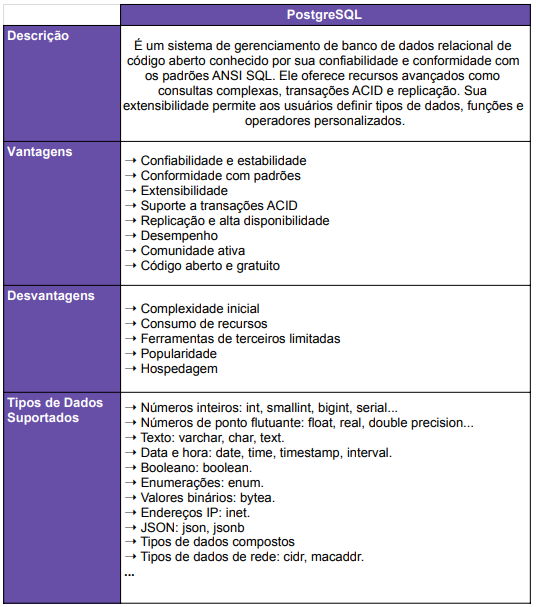

### Tarefa 7

Analisar e descrever os detalhes dos seguintes sistemas de arquivo disponíveis no Linux: Ext2, Ext3, ReiserFS e XFS. Construir uma tabela comparativa das principais características de cada um dos dois sistemas. Utilize, se necessário, diagramas, gráficos, etc.
O que entregar: Relatório com o resultado da análise e descrição apresentador no jupyter notebook.

Os sistemas de arquivos Ext2, Ext3, ReiserFS e XFS são opções disponíveis no Linux e a finalidade deles é armazenar e gerenciar os dados em disco no ambiente Linux. Cada um desses sistemas de arquivos oferece diferentes recursos e características. O Ext2 é simples e robusto, mas não possui journaling. O Ext3 é uma extensão do Ext2 com journaling, oferecendo melhor recuperação em caso de falhas. O ReiserFS usa uma estrutura de árvore balanceada, sendo adequado para muitos pequenos arquivos. O XFS é conhecido por seu alto desempenho e escalabilidade, sendo adequado para grandes volumes de dados.
Cada um desses sistemas de arquivos possui características distintas e é adequado para diferentes casos de uso. A escolha do sistema de arquivos depende das necessidades específicas do ambiente, como confiabilidade, desempenho, escalabilidade e recursos avançados de recuperação de dados. Segue abaixo uma explicação mais detalhada:

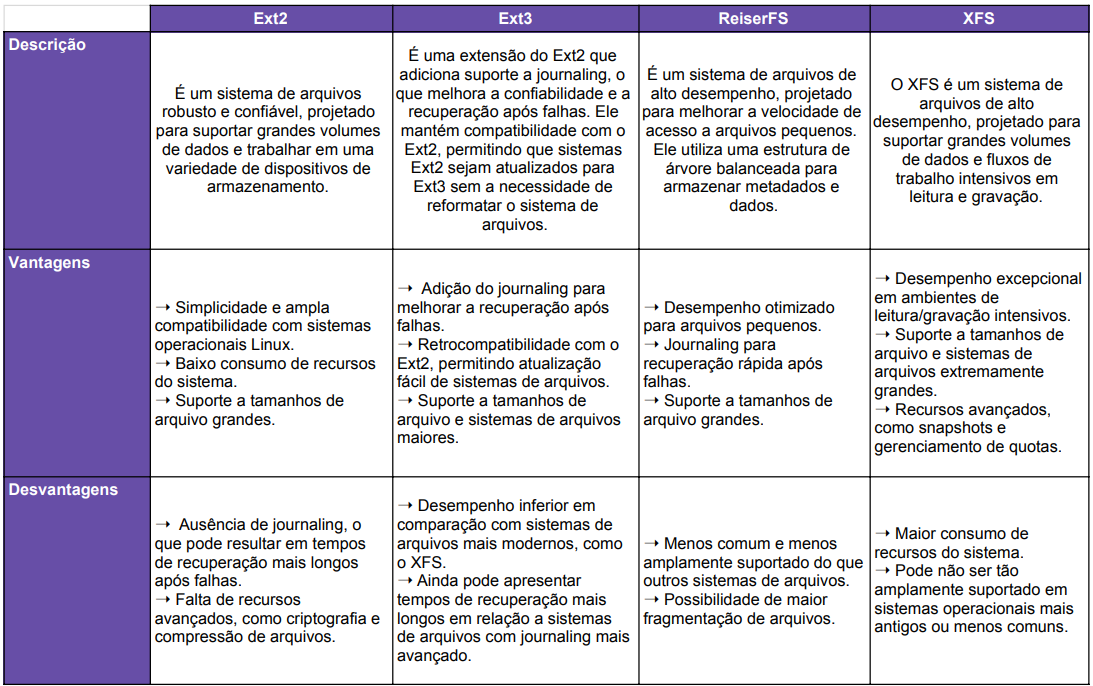

### Tarefa 8

Re-executar a carga de dados no PostgreSQL para vários tipos de arquivos e configurações distintas. 
O que entregar: Tabelas comparativas para cada SGBD, arquivo e sistema de arquivos usados em termos do tempo de execução e do espaço ocupado no disco.

### Tarefa 9
Analisar as tabelas da Tarefa 8 explicando os valores de tempo e espaço obtidos.

## Parte III
### Tarefa 10 – Preparação de Tabela Exemplo

Criar uma tabela com uma chave simples e alguns dados de exemplo. Cada valor de chave é um número incremental e está associado a com valores que variam de 0 até 10:

DROP TABLE IF EXISTS t;
CREATE TABLE t (k serial PRIMARY KEY, v integer);

INSERT INTO t(v) 
SELECT trunc(random() * 10)  FROM generate_series(1,100000);

O que entregar: Imprimir os valores das 10 primeiras tuplas da tabela, ordenando por k.

In [ ]:
!sudo -u postgres createdb mydb
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "DROP TABLE IF EXISTS t" -c "CREATE TABLE t (k serial PRIMARY KEY, v integer)" -c "INSERT INTO t(v) SELECT trunc(random() * 10)  FROM generate_series(1,100000)" -c "SELECT * FROM t ORDER BY k asc LIMIT 10"

NOTICE:  table "t" does not exist, skipping
DROP TABLE
CREATE TABLE
INSERT 0 100000
 k  | v 
----+---
  1 | 5
  2 | 9
  3 | 0
  4 | 4
  5 | 3
  6 | 1
  7 | 2
  8 | 5
  9 | 5
 10 | 5
(10 rows)

>8

### Tarefa 11  – Páginas criadas
Verifique quantas páginas com blocos foram criadas para a tabela da Tarefa 10.

Commando: SELECT relname, relpages, reltuples FROM pg_class WHERE relname='t'QL.

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "SELECT relname, relpages, reltuples FROM pg_class WHERE relname='t'"

 relname | relpages | reltuples 
---------+----------+-----------
 t       |      443 |    100000
(1 row)

>8

### Tarefa 12 – Blocos

Verifique quantos blocos foram efetivamente usados numa consulta

Comando:
SELECT pg_sleep(1);
\pset x on
SELECT * FROM pg_stats WHERE relname='t';
SELECT pg_stat_reset();
\pset x off

Observação: Em algumas versões do PostgreSQL, o atributo é chamado de tablename em vez de relname.


In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "SELECT pg_sleep(1)" -c "\pset x on" -c "SELECT * FROM pg_stats WHERE tablename='t'" -c "SELECT pg_stat_reset()" -c "\pset x off"

 pg_sleep 
----------
 
(1 row)

>8Expanded display is on.
-[ RECORD 1 ]----------+-------------------------------------------------------- -------------------------------------------------------------------------------- -------------------------------------------------------------------------------- -------------------------------------------------------------------------------- -------------------------------------------------------------------------------- -------------------------------------------------------------------------------- -------------------------------------------------------------------------------- ----------------------------------------------------------
schemaname             | public
tablename              | t
attname                | k
inherited              | f
null_frac              | 0
avg_width              | 4
n_distinct             | -1
most_common_vals       | 
most_common_freqs      | 
-[ RECORD 1 ]-+-
pg_stat_reset | 

>8Expanded display is 

### Tarefa 13 – Índice

Crie um índice para o atributo ‘v’ e realize consultas e criação de índice

Qual o tempo gasto para realizar uma consulta para um valor (tendo a tabela 100000 tuplas)?
Qual o tempo gasto para recriar um índice para o atributo ‘v’?

Remova a tabela ‘t’ e crie novamente com 1.0000.000 de tuplas

Qual o tempo gasto para realizar uma consulta para um valor específico?
Qual o tempo gasto para recriar um índice para o atributo ‘v’?


In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v ON t(v)"

CREATE INDEX


In [ ]:
#Qual o tempo gasto para realizar uma consulta para um valor (tendo a tabela 100000 tuplas)?
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

                                                         QUERY PLAN                                                          
-------------------------------------------------------------------------------- --------------------------------------------
 Bitmap Heap Scan on t  (cost=189.82..757.85 rows=10003 width=8) (actual time=0. 830..4.418 rows=10015 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=443
   ->  Bitmap Index Scan on t_index_v  (cost=0.00..187.31 rows=10003 width=0) (a ctual time=0.768..0.769 rows=10015 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.461 ms
 Execution time: 4.845 ms
(7 rows)

>8

In [ ]:
#Qual o tempo gasto para recriar um índice para o atributo ‘v’?
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v ON t(v)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v" already exists
Time: 0.786 ms
Timing is off.


Remova a tabela ‘t’ e crie novamente com 1.0000.000 de tuplas


In [ ]:
#Remova a tabela ‘t’ e crie novamente com 1.0000.000 de tuplas
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "DROP TABLE IF EXISTS t" -c "CREATE TABLE t (k serial PRIMARY KEY, v integer)" -c "INSERT INTO t(v) SELECT trunc(random() * 10)  FROM generate_series(1,10000000)"

DROP TABLE
CREATE TABLE
INSERT 0 10000000


In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v ON t(v)"

CREATE INDEX


In [ ]:
#Qual o tempo gasto para realizar uma consulta para um valor específico?
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

                                                           QUERY PLAN                                                            
-------------------------------------------------------------------------------- ------------------------------------------------
 Bitmap Heap Scan on t  (cost=939.93..47916.70 rows=50000 width=8) (actual time= 96.257..515.492 rows=1000592 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=44248
   ->  Bitmap Index Scan on t_index_v  (cost=0.00..927.43 rows=50000 width=0) (a ctual time=87.284..87.286 rows=1000592 loops=1)
         Index Cond: (v = 5)
 Planning time: 1.093 ms
 Execution time: 554.148 ms
(7 rows)

>8

In [ ]:
#Qual o tempo gasto para recriar um índice para o atributo ‘v’?
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v ON t(v)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v" already exists
Time: 1.054 ms
Timing is off.


### Tarefa 14 – Fill factor
Quando se cria um novo índice, nem toda entrada no bloco do índice é usada. Um espaço livre é deixado, conforme o parâmetro fillfactor. 

Crie novos índices usando fillfactor=60,80,90 e 100. Analise o desempenho de suas consultas usando as mesmas condições da Tarefa 13

ALTER TABLE foo SET ( fillfactor = 50);
VACUUM FULL foo;


####Tabela 100000 tuplas

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "DROP TABLE IF EXISTS t" -c "CREATE TABLE t (k serial PRIMARY KEY, v integer)" -c "INSERT INTO t(v) SELECT trunc(random() * 10)  FROM generate_series(1,100000)"

DROP TABLE
CREATE TABLE
INSERT 0 100000


##### fillfactor = 60

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v_ff60 ON t (v) WITH (fillfactor = 60)" -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

CREATE INDEX
                                                         QUERY PLAN                                                           
-------------------------------------------------------------------------------- ---------------------------------------------
 Bitmap Heap Scan on t  (cost=16.29..486.63 rows=500 width=8) (actual time=0.739 ..3.171 rows=9986 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=443
   ->  Bitmap Index Scan on t_index_v_ff60  (cost=0.00..16.17 rows=500 width=0)  (actual time=0.684..0.685 rows=9986 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.339 ms
 Execution time: 3.572 ms
(7 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v_ff60 ON t (v) WITH (fillfactor = 60)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v_ff60" already exists
Time: 0.712 ms
Timing is off.


##### fillfactor = 80

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v_ff80 ON t (v) WITH (fillfactor = 80)" -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

CREATE INDEX
                                                           QUERY PLAN                                                            
-------------------------------------------------------------------------------- ------------------------------------------------
 Bitmap Heap Scan on t  (cost=207.18..777.22 rows=10163 width=8) (actual time=0. 807..4.359 rows=9986 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=443
   ->  Bitmap Index Scan on t_index_v_ff80  (cost=0.00..204.64 rows=10163 width= 0) (actual time=0.724..0.725 rows=9986 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.543 ms
 Execution time: 4.787 ms
(7 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v_ff80 ON t (v) WITH (fillfactor = 80)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v_ff80" already exists
Time: 0.697 ms
Timing is off.


##### fillfactor = 90

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v_ff90 ON t (v) WITH (fillfactor = 90)" -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

CREATE INDEX
                                                           QUERY PLAN                                                            
-------------------------------------------------------------------------------- ------------------------------------------------
 Bitmap Heap Scan on t  (cost=195.06..765.09 rows=10163 width=8) (actual time=0. 737..3.419 rows=9986 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=443
   ->  Bitmap Index Scan on t_index_v_ff90  (cost=0.00..192.51 rows=10163 width= 0) (actual time=0.679..0.680 rows=9986 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.441 ms
 Execution time: 3.836 ms
(7 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v_ff90 ON t (v) WITH (fillfactor = 90)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v_ff90" already exists
Time: 0.671 ms
Timing is off.


##### fillfactor = 100

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v_ff100 ON t (v) WITH (fillfactor = 100)" -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

CREATE INDEX
                                                           QUERY PLAN                                                             
-------------------------------------------------------------------------------- -------------------------------------------------
 Bitmap Heap Scan on t  (cost=183.06..753.09 rows=10163 width=8) (actual time=1. 114..4.901 rows=9986 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=443
   ->  Bitmap Index Scan on t_index_v_ff100  (cost=0.00..180.51 rows=10163 width =0) (actual time=1.035..1.035 rows=9986 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.768 ms
 Execution time: 5.426 ms
(7 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v_ff100 ON t (v) WITH (fillfactor = 100)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v_ff100" already exists
Time: 0.727 ms
Timing is off.


#### Tabela com 10000000 tuplas

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "DROP TABLE IF EXISTS t" -c "CREATE TABLE t (k serial PRIMARY KEY, v integer)" -c "INSERT INTO t(v) SELECT trunc(random() * 10)  FROM generate_series(1,10000000)"

DROP TABLE
CREATE TABLE
INSERT 0 10000000


##### fillfactor = 60

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v_ff60 ON t (v) WITH (fillfactor = 60)" -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

CREATE INDEX
                                                             QUERY PLAN                                                               
-------------------------------------------------------------------------------- -----------------------------------------------------
 Bitmap Heap Scan on t  (cost=1215.93..48192.70 rows=50000 width=8) (actual time =79.037..464.768 rows=998703 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=44248
   ->  Bitmap Index Scan on t_index_v_ff60  (cost=0.00..1203.43 rows=50000 width =0) (actual time=69.721..69.722 rows=998703 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.451 ms
 Execution time: 505.199 ms
(7 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v_ff60 ON t (v) WITH (fillfactor = 60)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v_ff60" already exists
Time: 1.748 ms
Timing is off.


##### fillfactor = 80

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v_ff80 ON t (v) WITH (fillfactor = 80)" -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

CREATE INDEX
                                                             QUERY PLAN                                                              
-------------------------------------------------------------------------------- ----------------------------------------------------
 Bitmap Heap Scan on t  (cost=1007.93..47984.70 rows=50000 width=8) (actual time =70.110..488.617 rows=998703 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=44248
   ->  Bitmap Index Scan on t_index_v_ff80  (cost=0.00..995.43 rows=50000 width= 0) (actual time=60.480..60.481 rows=998703 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.396 ms
 Execution time: 526.668 ms
(7 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v_ff80 ON t (v) WITH (fillfactor = 80)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v_ff80" already exists
Time: 1.406 ms
Timing is off.


##### fillfactor = 90

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v_ff90 ON t (v) WITH (fillfactor = 90)" -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

CREATE INDEX
                                                             QUERY PLAN                                                              
-------------------------------------------------------------------------------- ----------------------------------------------------
 Bitmap Heap Scan on t  (cost=939.93..47916.70 rows=50000 width=8) (actual time= 77.568..505.486 rows=998703 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=44248
   ->  Bitmap Index Scan on t_index_v_ff90  (cost=0.00..927.43 rows=50000 width= 0) (actual time=67.469..67.470 rows=998703 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.543 ms
 Execution time: 544.554 ms
(7 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v_ff90 ON t (v) WITH (fillfactor = 90)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v_ff90" already exists
Time: 1001.492 ms (00:01.001)
Timing is off.


##### fillfactor = 100

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX t_index_v_ff100 ON t (v) WITH (fillfactor = 100)" -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

CREATE INDEX
                                                             QUERY PLAN                                                               
-------------------------------------------------------------------------------- -----------------------------------------------------
 Bitmap Heap Scan on t  (cost=883.93..47860.70 rows=50000 width=8) (actual time= 69.027..427.480 rows=998703 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=44248
   ->  Bitmap Index Scan on t_index_v_ff100  (cost=0.00..871.43 rows=50000 width =0) (actual time=60.511..60.512 rows=998703 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.495 ms
 Execution time: 466.087 ms
(7 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\timing on" -c "CREATE INDEX t_index_v_ff100 ON t (v) WITH (fillfactor = 100)" -c "\timing off"

Timing is on.
ERROR:  relation "t_index_v_ff100" already exists
Time: 2.164 ms
Timing is off.


### Tarefa 15 - Usando índice com múltiplas colubnas
Anulada

### Tarefa 16 - Utilize índices com ordem DESC

Repita os testes das Tarefas 13 e 14 usando índices descendentes. Avalie e registre na ficha

Comando: CREATE INDEX i ON t(v DESC NULLS FIRST);

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "DROP TABLE IF EXISTS t" -c "CREATE TABLE t (k serial PRIMARY KEY, v integer)" -c "INSERT INTO t(v) SELECT trunc(random() * 10)  FROM generate_series(1,100000)"

DROP TABLE
CREATE TABLE
INSERT 0 100000


In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX i ON t(v DESC NULLS FIRST)"

CREATE INDEX


#### Teste com tarefa 14

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

                                                    QUERY PLAN                                                      
-------------------------------------------------------------------------------- -----------------------------------
 Bitmap Heap Scan on t  (cost=188.32..753.94 rows=9810 width=8) (actual time=1.0 65..4.920 rows=10052 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=443
   ->  Bitmap Index Scan on i  (cost=0.00..185.87 rows=9810 width=0) (actual tim e=1.003..1.003 rows=10052 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.607 ms
 Execution time: 5.365 ms
(7 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "DROP TABLE IF EXISTS t" -c "CREATE TABLE t (k serial PRIMARY KEY, v integer)" -c "INSERT INTO t(v) SELECT trunc(random() * 10)  FROM generate_series(1,10000000)"

DROP TABLE
CREATE TABLE
INSERT 0 10000000


In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "CREATE INDEX i ON t(v DESC NULLS FIRST)"

CREATE INDEX


In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN ANALYSE SELECT * FROM t WHERE v = 5"

                                                      QUERY PLAN                                                        
-------------------------------------------------------------------------------- ---------------------------------------
 Bitmap Heap Scan on t  (cost=939.93..47916.70 rows=50000 width=8) (actual time= 93.760..608.302 rows=999960 loops=1)
   Recheck Cond: (v = 5)
   Heap Blocks: exact=44248
   ->  Bitmap Index Scan on i  (cost=0.00..927.43 rows=50000 width=0) (actual ti me=84.402..84.403 rows=999960 loops=1)
         Index Cond: (v = 5)
 Planning time: 0.871 ms
 Execution time: 646.627 ms
(7 rows)

>8

##Parte IV


### Tarefa 17 - Preparação e Verificação do Ambiente
a) Execute o script movie.sql para criar as tabelas e índices e carregar os dados necessários às próximas atividades
b)
Verifique no catálogo do banco de dados os seguintes metadados sobre os índices associados às tabelas e apresente-os no relatório: Nome do índice, nome da tabela, altura, número máximo de chaves por bloco, número médio de chaves por bloco, número de blocos folha, número de médio de blocos folha por chave, número médio de blocos de dados por chave, número de linhas e número de chaves distintas. 

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "DROP TABLE IF EXISTS movie"
!psql -h 127.0.0.1 -d mydb -U "postgres" -p "5432" -a -q -f "/content/TP3-BD1-2021-02 [2022]Tabelas/movie.sql"

DROP TABLE
drop table movie;
psql:/content/TP3-BD1-2021-02 [2022]Tabelas/movie.sql:1: ERROR:  table "movie" does not exist
create table movie
(
	id smallint,
	title varchar(70),
	yr smallint,
	score float(15),
	votes integer,
	director smallint,
	constraint movie_key primary key (id)
);
create index movie_title on movie(title);
create index movie_votes on movie(votes);
insert into movie values (1, 'Star Wars', 1977, 8.8, 53567, 360);
insert into movie values (2, 'Shawshank Redemption, The', 1994, 9, 44974, 1040);
insert into movie values (3, 'Pulp Fiction', 1994, 8.6, 43993, 444);
insert into movie values (4, 'Titanic', 1997, 7.2, 43371, 198);
insert into movie values (5, 'Star Wars: Episode V - The Empire Strikes Back', 1980, 8.6, 39446, 651);
insert into movie values (6, 'Usual Suspects, The', 1995, 8.7, 35027, 639);
insert into movie values (7, 'Schindler''s List', 1993, 8.8, 34251, 18);
insert into movie values (8, 'Saving Private Ryan', 1998, 8.5, 34113, 18);
insert into movie val


b)Verifique no catálogo do banco de dados os seguintes metadados sobre os índices associados às tabelas e apresente-os no relatório: Nome do índice, nome da tabela, altura, número máximo de chaves por bloco, número médio de chaves por bloco, número de blocos folha, número de médio de blocos folha por chave, número médio de blocos de dados por chave, número de linhas e número de chaves distintas. 

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "\d+ movie"

                                           Table "public.movie"
  Column  |         Type          | Collation | Nullable | Default | Storage  |  Stats target | Description 
----------+-----------------------+-----------+----------+---------+----------+- -------------+-------------
 id       | smallint              |           | not null |         | plain    |               | 
 title    | character varying(70) |           |          |         | extended |               | 
 yr       | smallint              |           |          |         | plain    |               | 
 score    | real                  |           |          |         | plain    |               | 
 votes    | integer               |           |          |         | plain    |               | 
 director | smallint              |           |          |         | plain    |               | 
Indexes:
    "movie_key" PRIMARY KEY, btree (id)
    "movie_title" btree (title)
    "movie_votes" btree (votes)

>8

### Tarefa 18 - Consultas por intervalo e índices secundários

a) Escreva uma consulta em SQL sobre o atributo VOTES da tabela MOVIE que recupera um número pequeno de tuplas (<10 tuplas); Execute o comando EXPLAIN sobre esta consulta e apresente os resultados.
b) 
Escreva uma consulta em SQL sobre o atributo VOTES da tabela MOVIE que recupera um número grande de tuplas (>80% das tuplas). Execute o comando EXPLAIN sobre esta consulta e apresente os resultados.c) 
Explique porque o índice sobre VOTES não é sempre usado nas consultas sobre este atributo. 



In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT * FROM movie WHERE votes > 200 and votes < 740"

                                QUERY PLAN                                
--------------------------------------------------------------------------
 Index Scan using movie_votes on movie  (cost=0.28..8.44 rows=8 width=30)
   Index Cond: ((votes > 200) AND (votes < 740))
(2 rows)

>8


b)Escreva uma consulta em SQL sobre o atributo VOTES da tabela MOVIE que recupera um número grande de tuplas (>80% das tuplas). Execute o comando explain sobre esta consulta e apresente os resultados.

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT * FROM movie WHERE votes > 800 AND votes < 9000"

                        QUERY PLAN                        
----------------------------------------------------------
 Seq Scan on movie  (cost=0.00..42.66 rows=1616 width=30)
   Filter: ((votes > 800) AND (votes < 9000))
(2 rows)

>8

**c)Explique porque o índice sobre VOTES não é sempre usado nas consultas sobre este atributo.**

Em algumas consultas, o índice na coluna 'votes' pode não ser utilizado, pois a consulta pode não precisar avaliar esse campo de acordo com algum critério. Um exemplo disso é a questão b, onde o índice 'indice_votes' não foi usado para retornar as 1616 tuplas.

### Tarefa 19 - Comparações de operadores de agregação
Considere as seguintes consultas em SQL, sobre o atributo VOTES, as quais são equivalentes:
SELECT title FROM movie WHERE votes >= (SELECT MAX(votes) FROM movie); 
SELECT title FROM movie WHERE votes >= ALL (SELECT votes FROM movie) a) ;
Apresente o resultado do comando explain sobre as duas consultas acib) ma
Existe alguma diferença entre os planos de consultas? Qual das duas é mais eficiente? Explique?

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT title FROM movie WHERE votes >= (SELECT MAX(votes) FROM movie)"

                                                       QUERY PLAN                                                         
-------------------------------------------------------------------------------- -----------------------------------------
 Index Scan using movie_votes on movie  (cost=0.62..35.38 rows=615 width=16)
   Index Cond: (votes >= $1)
   InitPlan 2 (returns $1)
     ->  Result  (cost=0.33..0.34 rows=1 width=4)
           InitPlan 1 (returns $0)
             ->  Limit  (cost=0.28..0.33 rows=1 width=4)
                   ->  Index Only Scan Backward using movie_votes on movie movie _1  (cost=0.28..94.55 rows=1844 width=4)
                         Index Cond: (votes IS NOT NULL)
(8 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT title FROM movie WHERE votes >= ALL (SELECT votes FROM movie)"

                                  QUERY PLAN                                   
-------------------------------------------------------------------------------
 Seq Scan on movie  (cost=0.00..43620.99 rows=922 width=16)
   Filter: (SubPlan 1)
   SubPlan 1
     ->  Materialize  (cost=0.00..42.66 rows=1844 width=4)
           ->  Seq Scan on movie movie_1  (cost=0.00..33.44 rows=1844 width=4)
(5 rows)

>8

**b)Existe alguma diferença entre os planos de consultas? Qual das duas é mais eficiente? Explique?**

As duas consultas possuem estratégias de execução distintas. A primeira consulta é consideravelmente mais rápida, pois utiliza o índice "indice_votes" para realizar a busca, o que é mais eficiente. Por outro lado, a segunda consulta realiza uma busca sequencial por toda a tabela, o que pode ser mais demorado.

### Tarefa 20 - Consultas com Junção e Seleção
Considere as duas consultas equivalentes em SQL a seguir, as quais retornam os filmes com mais votos que “Star Wars” 
SELECT title FROM movie WHERE votes > (SELECT votes FROM movie WHERE title = 'Star Wars');

SELECT m1.title FROM movie m1, movie m2 WHERE m1.votes > m2.votes AND m2.title = 'Star Wars';

a) Apresente o resultado do comando explain sobre as duas consultas acima




In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT title FROM movie WHERE votes > (SELECT votes FROM movie WHERE title = 'Star Wars')"

                                       QUERY PLAN                                         
-------------------------------------------------------------------------------- ---------
 Index Scan using movie_votes on movie  (cost=8.57..43.34 rows=615 width=16)
   Index Cond: (votes > $0)
   InitPlan 1 (returns $0)
     ->  Index Scan using movie_title on movie movie_1  (cost=0.28..8.29 rows=1  width=4)
           Index Cond: ((title)::text = 'Star Wars'::text)
(5 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT m1.title FROM movie m1, movie m2 WHERE m1.votes > m2.votes AND m2.title = 'Star Wars'"

                                      QUERY PLAN                                       
-------------------------------------------------------------------------------- ------
 Nested Loop  (cost=0.56..49.49 rows=615 width=16)
   ->  Index Scan using movie_title on movie m2  (cost=0.28..8.29 rows=1 width=4 )
         Index Cond: ((title)::text = 'Star Wars'::text)
   ->  Index Scan using movie_votes on movie m1  (cost=0.28..35.04 rows=615 widt h=20)
         Index Cond: (votes > m2.votes)
(5 rows)

>8

**b)Existe alguma diferença entre os planos de consultas? Qual das duas é mais eficiente? Explique?**

Ambas as consultas retornam os mesmos resultados, mas a primeira consulta é mais eficiente do que a segunda. Isso ocorre porque a primeira consulta utiliza o índice "movie_vote" para fazer uma busca direta na tabela "movie", o que é uma operação mais rápida e eficiente do que o "Nested Loop" realizado na segunda consulta.

### Tarefa 21 - Casamento de Strings e Índices
Considere as seguintes consultas SQL sobre o atributo  TITLE usando o operador LIKE. 
SELECT title FROM movie WHERE title LIKE 'I%';
SELECT title FROM movie WHERE substr(title, 1, 1) = 'I';
SELECT title FROM movie WHERE title LIKE '%A';

a) Apresente o resultado do comando explain sobre as três consultas acima




In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT title FROM movie WHERE title LIKE 'I%'"

                       QUERY PLAN                       
--------------------------------------------------------
 Seq Scan on movie  (cost=0.00..38.05 rows=18 width=16)
   Filter: ((title)::text ~~ 'I%'::text)
(2 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT title FROM movie WHERE substr(title, 1, 1) = 'I'"

                      QUERY PLAN                       
-------------------------------------------------------
 Seq Scan on movie  (cost=0.00..42.66 rows=9 width=16)
   Filter: (substr((title)::text, 1, 1) = 'I'::text)
(2 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT title FROM movie WHERE title LIKE '%A'"

                       QUERY PLAN                       
--------------------------------------------------------
 Seq Scan on movie  (cost=0.00..38.05 rows=18 width=16)
   Filter: ((title)::text ~~ '%A'::text)
(2 rows)

>8

**b)Qual das três apresenta o menor custo? Porque?** 

A primeira e a terceira consulta apresentam o mesmo custo (30.05), custo melhor comparado ao da segunda consulta, cujo valor foi de 42.66. O resultado é devido ao fato do operador LIKE apresentar um custo menor comparado ao utilizar substr.

**c)O índice sobre TITLE foi usado para todas elas? Justifique.**

Nas consultas acima, o índice sobre a coluna 'title' (movie_title) não foi utilizado. Em vez disso, foram feitas leituras sequenciais. Para aproveitar o índice, teria sido necessário utilizar um operador de igualdade (=) na consulta.


### Tarefa 22 - Verificação da hipótese de distribuição uniforme na estimativa de seletividade
Considere as seguintes  consultas sobre o atributo TITLE da tabela MOVIE
SELECT title FROM movie WHERE votes < 1000;
SELECT title FROM movie WHERE votes > 40000


a) Apresente o resultado do comando explain sobre as duas consultas acima. Explique o resultado.




In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT title FROM movie WHERE votes < 1000"

                                 QUERY PLAN                                  
-----------------------------------------------------------------------------
 Index Scan using movie_votes on movie  (cost=0.28..20.04 rows=329 width=16)
   Index Cond: (votes < 1000)
(2 rows)

>8

In [ ]:
!sudo -u postgres psql -h 127.0.0.1 -d mydb -U postgres -c "EXPLAIN SELECT title FROM movie WHERE votes > 40000"

                                QUERY PLAN                                
--------------------------------------------------------------------------
 Index Scan using movie_votes on movie  (cost=0.28..8.42 rows=8 width=16)
   Index Cond: (votes > 40000)
(2 rows)

>8

Ambas as consultas utilizam o índice na coluna de votos (movie_votes). No entanto, a segunda consulta apresenta um custo menor devido ao menor número de operações e ao número reduzido de tuplas envolvidas (apenas 4 tuplas).

**b)Compare o número de tuplas selecionadas por cada consulta. Qual das duas tem a menor seletividade?**

A primeira consulta retorna 326 tuplas, enquanto a segunda retorna apenas 4 tuplas. A primeira consulta possui uma seletividade melhor, pois a busca foi realizada em 329 tuplas (329 para 326), enquanto a segunda consulta percorreu 8 tuplas (8 para 4), o dobro.

#Parte V

### Tarefa 23

Implemente as versões a e b do processo de reserva

In [ ]:
!sudo apt-get update
!sudo apt-get install postgresql

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3,369 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-d

In [ ]:
!sudo service postgresql start

 * Starting PostgreSQL 10 database server
   ...done.


In [ ]:
!sudo -u postgres psql -c "ALTER USER postgres PASSWORD 'password'"

ALTER ROLE


In [ ]:
import psycopg2
import random
import time

#cria uma conexão com o banco
def connect():
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(database="postgres", user='postgres', password='password', host='127.0.0.1', port= '5432')
        print("Conection successful")

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)

    return conn

#desconecta do banco
def disconnect(conn):
    if conn is not None:
        conn.close()
        print('Database connection closed.')

#cria a tabela de assentos
def create_table_assentos(cur):
    cur.execute("DROP TABLE IF EXISTS assentos")
    cur.execute("CREATE TABLE assentos (num_voo INTEGER PRIMARY KEY, disp BOOLEAN)")

#popula a tabela de assentos
def populate_assentos(cur):
    for i in range(1, 201):
        cur.execute(f"INSERT INTO assentos VALUES ({i}, true);")

#busca todos os acentos disponiveis
def passo1(cur):
    cur.execute("SELECT * FROM assentos WHERE disp=true;")
    return cur.fetchall()

#seleciona um assento aleatorio
def passo2(assentos):
    time.sleep(1)
    return assentos[random.randint(0, len(assentos)-1)][0]

#atualiza o banco
def passo3(cur, num):
    cur.execute(f"UPDATE assentos SET disp = false WHERE num_voo = {num};")

def reset_table(cur):
    cur.execute(f"UPDATE assentos SET disp = true WHERE disp = false;")

In [ ]:
def versao_a(cur):
    cur.execute("begin;")
    assentos = passo1(cur)
    if(assentos == []):
        cur.execute("commit;")
        return False
    assento = passo2(assentos)
    passo3(cur, assento)
    cur.execute("commit;")
    return True

def versao_b(cur):
    cur.execute("begin;")
    assentos = passo1(cur)
    cur.execute("commit;")
    if(assentos == []):
        return False
    assento = passo2(assentos)
    cur.execute("begin;")
    passo3(cur, assento)
    cur.execute("commit;")
    return True

### Tarefa 24
Apresente gráficos de linha onde, para cada valor de k (número de agentes) no eixo x, temos no eixo y o tempo necessário para que todos os clientes efetuem suas reservas. Um gráfico diferente deve ser apresentado para cada par de versões da reserva e nível de isolamento.

In [ ]:
import threading
import time

#executa as queries transacoes ate as reservas acabarem
def agente_viagem(cur, versao):
    while(versao(cur)):
        pass

#criar as threads e as coloca para executar
def simulacao(cur, versao, k):
    threads = []
    for i in range(k):
        t = threading.Thread(target=agente_viagem, args=(cur, versao,))
        threads.append(t)
        t.start()

    for t in threads:
        t.join()

conn = connect()    #cria uma conexão
cur = conn.cursor() #cria um cursor

create_table_assentos(cur) #cria a tabela de assentos
populate_assentos(cur)     #popula a tabela de acentos

#executa os experimentos da versão a
eixo_xa = []
eixo_ya = []
for k in [1,2,4,6,8,10]:
    print(f"Resultados para k = {k}")
    eixo_xa.append(k)
    start = time.time()
    simulacao(cur, versao_a, k)
    eixo_ya.append(time.time() - start)
    reset_table(cur)

#executa os experimentos da versão a
eixo_xb = []
eixo_yb = []
for k in [1,2,4,6,8,10]:
    print(f"Resultados para k = {k}")
    eixo_xb.append(k)
    start = time.time()
    simulacao(cur, versao_b, k)
    eixo_yb.append(time.time() - start)
    reset_table(cur)

cur.close()
disconnect(conn)

Gráfico versao a

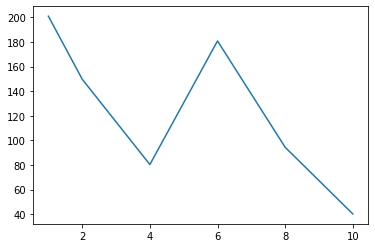

In [ ]:
import matplotlib.pyplot as plt

plt.plot(eixo_xa, eixo_ya)

plt.show()

Gráfico versão b

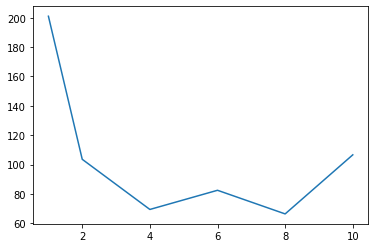

[1, 2, 4, 6, 8, 10]


In [ ]:
plt.plot(eixo_xb, eixo_yb)

plt.show()

### Tarefa 25
Apresente uma tabela com o número máximo, mínimo e médio de vezes que um cliente teve que tentar reservar um assento até conseguir, ou seja, o número de vezes que uma reserva teve que ser refeita. A tabela considera as variações de k, versão de reserva e nível de isolamento. 

### Tarefa 26

Apresente uma análise dos resultados obtidos em cada versão de reserva e tipo de isolamento, explicando as diferenças entre resultados.

A análise dos gráficos anteriores revela que a versão B é significativamente mais eficiente do que a versão A, porém é importante considerar algumas ressalvas. Uma análise precisa dos resultados é difícil de ser realizada, uma vez que as execuções múltiplas não foram consideradas para cada ponto no eixo x durante o experimento. Essa falta de consideração pode ter levado a imprecisões nos gráficos apresentados.

Ademais, é importante reconhecer que existem limitações de desempenho que podem ser superadas ao aumentar o número de encadeamentos. Em um cenário teórico em que ambas as versões são expostas a um número infinito de threads, o desempenho seria igual para ambas, uma vez que ambas estariam restritas à parte sequencial do código. No entanto, no mundo real, a versão B apresentará um desempenho superior, pois é capaz de aproveitar melhor o paralelismo disponível.

Ao que parece nas imagens anteriores, o paralelismo das transações desempenha um papel crucial no desempenho do sistema. A versão B se destaca ao dividir as operações em várias transações menores, o que resulta em um melhor aproveitamento do paralelismo e, consequentemente, em um sistema mais rápido.

No entanto, é fundamental ressaltar que uma análise aprofundada dessas questões é necessária para se obter resultados mais precisos. É preciso levar em consideração não apenas a divisão das transações, mas também outras variáveis ​​e fatores que podem influenciar o desempenho geral do sistema.